### A Study of the Relations of the Brain to to the Size of the Head

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to to the Size of the Head", Biometrika, Vol. 4, pp105-123

Description: Brain weight (grams) and head size (cubic cm) for 237 adults classified by gender and age group.

Variables/Columns GENDER: Gender Male or Female AGE: Age Range 20-46 or 46+ SIZE: Head size (cm^3) 21-24 WEIGHT: Brain weight (grams) 29-32

In [1]:
import pandas as pd

brain_headsize = pd.read_csv('../resources/brain_headsize.csv')
brain_headsize.head()

,gender,age,size,weight
0,Male,20-46,4512,1530
1,Male,20-46,3738,1297
2,Male,20-46,4261,1335
3,Male,20-46,3777,1282
4,Male,20-46,4177,1590


### Dummy Encoding (Binary Endcoded Data)

Converting strings, `gender` into numerical data. Using the `get_dummies` (Pandas provides a shortcut to create Binary Encoded Data) method to generate binary encoded data from the `brain_headsize` dataframe.

Dummy encoding transforms each categorical feature into new columns with a 1(True) or 0(False) encoding to represent if that categorical label was present or not in the original row.

In [2]:
data_binary_encoded = pd.get_dummies(brain_headsize)
data_binary_encoded.head()

,size,weight,gender_Female,gender_Male,age_20-46,age_46+
0,4512,1530,0,1,1,0
1,3738,1297,0,1,1,0
2,4261,1335,0,1,1,0
3,3777,1282,0,1,1,0
4,4177,1590,0,1,1,0


In [3]:
X = data_binary_encoded.drop('weight', axis=1)
y = data_binary_encoded['weight'].values.reshape(-1,1)

print(X.shape, y.shape)

(237, 5) (237, 1)


### Scaling and Normalization

Scaling and normalization is used on the data so that linear_model algorithm will perform better. This is especially useful on models that use gradient descent; it'll help it converge to a local optima. 

StandardScaler applies a Guassian distribution to our data where the mean is 0 and the standard deviation is 1. We can see the differences in the following plots.

In [4]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X, y, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter('ignore')

xscaler = StandardScaler().fit(xtrain)
yscaler = StandardScaler().fit(ytrain)

xtrain_scaled = xscaler.transform(xtrain)
ytrain_scaled = yscaler.transform(ytrain)

xtest_scaled = xscaler.transform(xtest)
ytest_scaled = yscaler.transform(ytest)

In [6]:
import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(15, 10))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = xtrain["size"].max()
maxy = ytrain.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(xtrain["size"], ytrain, c = '0.45')
axes2.scatter(xtrain_scaled[:,0], ytrain_scaled[:], c = '0.45')

### Residual

- Using a residual plot to check our predictions because we can't easily plot our line in 3D space. Residuals are the errors between the predicted and the actual values of y; we want it to show no pattern.

Text(0.5, 1.0, 'Residual Plot')

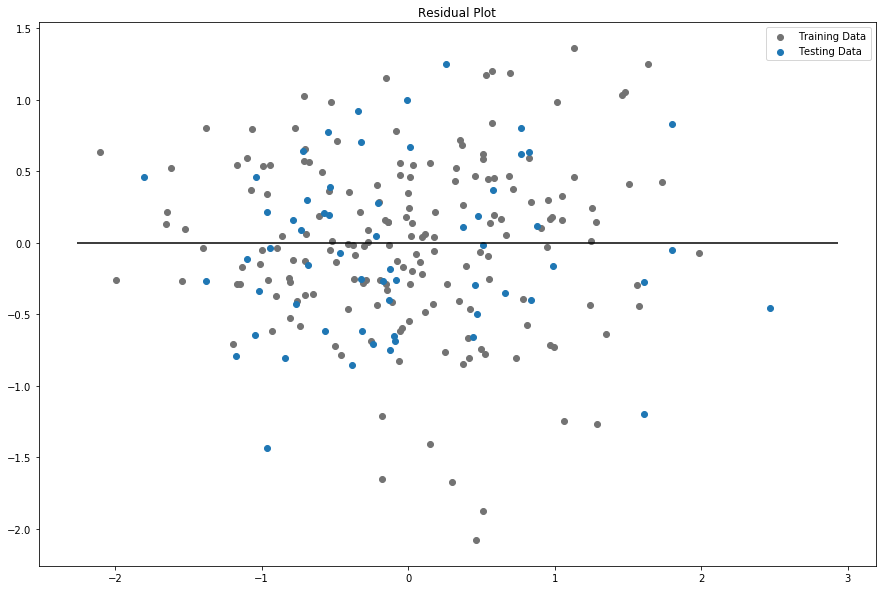

In [8]:
plt.figure(figsize=(15, 10))
plt.scatter(model.predict(xtrain_scaled), model.predict(xtrain_scaled)-ytrain_scaled, label='Training Data', c='0.45')
plt.scatter(model.predict(xtest_scaled), model.predict(xtest_scaled)-ytest_scaled, label='Testing Data')
plt.legend()
plt.hlines(y=0, xmin=ytest_scaled.min(),xmax=ytest_scaled.max())
plt.title('Residual Plot')

### Quantifying the Model
We want to find is a line that best fits the data in n-dimensional space. To achieve this, Linear Regression can be solved using the analytical approach called `ordinary least squares` or a computational appraoch `gradient descent` for estimating the parameters. Note that there are tradeoffs between using either approach. The Linear Regression model in Sklearn uses the `ordinary least squares` method.

 
There are a variety of ways to quantify the model, but MSE and R2 are very common

- MSE does not have an uppur bound.
- R2 is between 0 and 1.
- A 'good' MSE score will be close to zero while a 'good' R2 Score will be close to 1.

Fitting the scaled-training data into a `LinearRegression Model` and making predictions, then quantifying it with the `MSE` and `R2 Score`.



In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression().fit(xtrain_scaled, ytrain_scaled)

print('weight ceoffiecients:', model.coef_)
print('y-axis intercept:', model.intercept_)

weight ceoffiecients: [[ 0.74104434 -0.03952285  0.03952285  0.05029977 -0.05029977]]
y-axis intercept: [-9.21494404e-16]


Note: The weights are how important each feature is to the equation. This is the part that the algorithm has to learn.

The generic formula is:
y = bias + weight1*feature1 + weight2*feature2

Acceptable Mean-Squared-Error and R-Squared validating the LinearRegression model. 

In [59]:
scaled_predictions = model.predict(xtest_scaled)
predictions = model.predict(xtest)


scaled_mse = mean_squared_error(ytest_scaled, scaled_predictions)
scaled_r2 = model.score(xtest_scaled, ytest_scaled)

mse = mean_squared_error(ytest, predictions)
r2 = model.score(xtest, ytest)

pd.DataFrame({'Mean-Squared-Error': [f'{scaled_mse:.4}',
                                     f'{mse:.4}'], 
              
              'R-Squared': [f'{scaled_r2:.4}',
                            f'{r2:.4}']     
                            }, index = ['StandardScaler',
                                        'Unprocessed'])

,Mean-Squared-Error,R-Squared
StandardScaler,0.3231,0.6805
Unprocessed,1.983e+06,-135.4
